In [0]:
pip install shap

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


In [0]:
pip install numpy --upgrade

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/9b/5a/f265a1ba3641d16b5480a217a6aed08cceef09cd173b568cd5351053472a/numpy-1.26.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached numpy-1.26.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (58 kB)
Using cached numpy-1.26.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.58.0 requires numpy<1.26,>=1.21, but you have numpy 1.26.0 which is incompatible.
scipy 1.9.1 requires numpy<1.25.0,>=1.18.5,

In [0]:
pip install h2o

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


In [0]:
pip install fuzzywuzzy

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


In [0]:
pip install plotnine

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
  Obtaining dependency information for numpy>=1.23.0 from https://files.pythonhosted.org/packages/10/be/ae5bf4737cb79ba437879915791f6f26d92583c738d7d960ad94e5c36adf/numpy-1.24.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached numpy-1.24.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.0
    Uninstalling numpy-1.26.0:
      Successfully uninstalled numpy-1.26.0
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


In [0]:
pip install --upgrade pip

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


In [0]:
pip install xgboost

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


In [0]:
pip install shap

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


In [0]:
pip install catboost

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


In [0]:
pip install numba --upgrade

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pyspark.sql import SparkSession
from pyspark.sql.functions import when,current_date, expr,mean,col, sum as spark_sum,count,avg
from pyspark.sql.types import DoubleType,IntegerType,StringType,NumericType
from pyspark.ml.feature import OneHotEncoder, StringIndexer, Imputer, VectorAssembler
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from h2o.automl import H2OAutoML
from sklearn.metrics import mean_squared_error, r2_score
import h2o
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
#from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
import random

## Data Import

In [0]:
# Create empty lists for each column
collection_period = []
staff_name = []
crm_file = []
program = []
budget_type = []
activity_phase = []
stage = []
time_records = []

# Generate 5000 rows of random data
for _ in range(5000):
    collection_period.append(random.choice(['Jan 2023', 'Feb 2023', 'Mar 2023', 'Apr 2023']))
    staff_name.append(random.choice(['John Smith', 'Jane Doe', 'Bob Johnson', 'Mary Brown']))
    crm_file.append('CRM' + str(random.randint(10000, 99999)))
    program.append(random.choice(['Sales', 'Finance', 'Marketing', 'Operations']))
    budget_type.append(random.choice(['Marketing', 'Operations', 'Finance', 'Sales']))
    activity_phase.append(random.choice(['Planning', 'Execution', 'Monitoring', 'Closure']))
    stage.append(random.choice(['Draft', 'Final', 'Review', 'Approved']))
    time_records.append([random.randint(1, 60) for _ in range(10)])

# Calculate Total Minutes for each row
total_minutes = [sum(record) for record in time_records]

# Create a DataFrame from the lists
data = {
    'Collection Period:': collection_period,
    'Staff Name:': staff_name,
    'CRM File #:': crm_file,
    'Program:': program,
    'Budget Type:': budget_type,
    'Activity Phase:': activity_phase,
    'Stage:': stage,
}
for i in range(10):
    data[f'Time Record #{i + 1}'] = [record[i] for record in time_records]
data['Total Minutes:'] = total_minutes

TS = pd.DataFrame(data)

In [0]:
TS

,Collection Period:,Staff Name:,CRM File #:,Program:,Budget Type:,Activity Phase:,Stage:,Time Record #1,Time Record #2,Time Record #3,Time Record #4,Time Record #5,Time Record #6,Time Record #7,Time Record #8,Time Record #9,Time Record #10,Total Minutes:
0,Feb 2023,Mary Brown,CRM83943,Finance,Sales,Planning,Approved,57,15,32,5,51,57,25,59,1,28,330
1,Feb 2023,John Smith,CRM70509,Finance,Finance,Planning,Final,34,34,25,50,16,27,52,35,39,3,315
2,Jan 2023,John Smith,CRM36682,Finance,Operations,Closure,Final,22,42,23,55,18,46,56,54,30,2,348
3,Apr 2023,Mary Brown,CRM50994,Operations,Sales,Planning,Draft,27,15,28,11,6,48,59,1,48,16,259
4,Jan 2023,John Smith,CRM67508,Finance,Finance,Closure,Draft,11,31,35,13,54,16,43,54,53,45,355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Jan 2023,Mary Brown,CRM22143,Marketing,Sales,Monitoring,Final,6,48,31,51,60,7,58,3,58,19,341
4996,Feb 2023,Bob Johnson,CRM79705,Marketing,Operations,Monitoring,Approved,19,21,57,54,48,29,51,21,11,45,356
4997,Jan 2023,Bob Johnson,CRM31185,Sales,Operations,Monitoring,Draft,17,35,4,22,1,29,60,28,34,21,251
4998,Apr 2023,Mary Brown,CRM97494,Finance,Finance,Monitoring,Review,59,17,34,27,54,48,57,59,9,49,413


## Data Preprocessing

In [0]:
TS_c = TS.fillna(0,inplace=False)
TS_c

,Collection Period:,Staff Name:,CRM File #:,Program:,Budget Type:,Activity Phase:,Stage:,Time Record #1,Time Record #2,Time Record #3,Time Record #4,Time Record #5,Time Record #6,Time Record #7,Time Record #8,Time Record #9,Time Record #10,Total Minutes:
0,Feb 2023,Mary Brown,CRM83943,Finance,Sales,Planning,Approved,57,15,32,5,51,57,25,59,1,28,330
1,Feb 2023,John Smith,CRM70509,Finance,Finance,Planning,Final,34,34,25,50,16,27,52,35,39,3,315
2,Jan 2023,John Smith,CRM36682,Finance,Operations,Closure,Final,22,42,23,55,18,46,56,54,30,2,348
3,Apr 2023,Mary Brown,CRM50994,Operations,Sales,Planning,Draft,27,15,28,11,6,48,59,1,48,16,259
4,Jan 2023,John Smith,CRM67508,Finance,Finance,Closure,Draft,11,31,35,13,54,16,43,54,53,45,355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Jan 2023,Mary Brown,CRM22143,Marketing,Sales,Monitoring,Final,6,48,31,51,60,7,58,3,58,19,341
4996,Feb 2023,Bob Johnson,CRM79705,Marketing,Operations,Monitoring,Approved,19,21,57,54,48,29,51,21,11,45,356
4997,Jan 2023,Bob Johnson,CRM31185,Sales,Operations,Monitoring,Draft,17,35,4,22,1,29,60,28,34,21,251
4998,Apr 2023,Mary Brown,CRM97494,Finance,Finance,Monitoring,Review,59,17,34,27,54,48,57,59,9,49,413


In [0]:
TS_c.shape

(5000, 18)

In [0]:
#is there any categorical columns?
TS_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Collection Period:  5000 non-null   object
 1   Staff Name:         5000 non-null   object
 2   CRM File #:         5000 non-null   object
 3   Program:            5000 non-null   object
 4   Budget Type:        5000 non-null   object
 5   Activity Phase:     5000 non-null   object
 6   Stage:              5000 non-null   object
 7   Time Record #1      5000 non-null   int64 
 8   Time Record #2      5000 non-null   int64 
 9   Time Record #3      5000 non-null   int64 
 10  Time Record #4      5000 non-null   int64 
 11  Time Record #5      5000 non-null   int64 
 12  Time Record #6      5000 non-null   int64 
 13  Time Record #7      5000 non-null   int64 
 14  Time Record #8      5000 non-null   int64 
 15  Time Record #9      5000 non-null   int64 
 16  Time Record #10     5000

In [0]:
TS_c.duplicated().sum()

0

In [0]:
TS_mask = TS_c.duplicated()
if TS_mask.any():
    TS_c = TS_c[~TS_mask]
TS_c.duplicated().sum()

0

## Data Exploratory

In [0]:
TS_c.columns

Index(['Collection Period:', 'Staff Name:', 'CRM File #:', 'Program:',
       'Budget Type:', 'Activity Phase:', 'Stage:', 'Time Record #1',
       'Time Record #2', 'Time Record #3', 'Time Record #4', 'Time Record #5',
       'Time Record #6', 'Time Record #7', 'Time Record #8', 'Time Record #9',
       'Time Record #10', 'Total Minutes:'],
      dtype='object')

In [0]:
for col in TS_c.columns:
    if TS_c[col].dtype == 'object':
        counts = TS_c[col].value_counts()
        print(f"Value Counts for '{col}' is :")
        print(counts)

Value Counts for 'Collection Period:' is :
Apr 2023    1276
Mar 2023    1276
Feb 2023    1230
Jan 2023    1218
Name: Collection Period:, dtype: int64
Value Counts for 'Staff Name:' is :
Mary Brown     1290
Bob Johnson    1281
Jane Doe       1271
John Smith     1158
Name: Staff Name:, dtype: int64
Value Counts for 'CRM File #:' is :
CRM14394    3
CRM20497    2
CRM34467    2
CRM52679    2
CRM37680    2
           ..
CRM35548    1
CRM95378    1
CRM27653    1
CRM80004    1
CRM16982    1
Name: CRM File #:, Length: 4877, dtype: int64
Value Counts for 'Program:' is :
Marketing     1273
Finance       1272
Sales         1231
Operations    1224
Name: Program:, dtype: int64
Value Counts for 'Budget Type:' is :
Finance       1286
Marketing     1256
Operations    1246
Sales         1212
Name: Budget Type:, dtype: int64
Value Counts for 'Activity Phase:' is :
Monitoring    1301
Closure       1288
Execution     1213
Planning      1198
Name: Activity Phase:, dtype: int64
Value Counts for 'Stage:' is :

In [0]:
# Calculate the sum of 'Total Minutes' for each staff in each collection period
staff_sum_df = TS_c.groupby(['Staff Name:', 'Collection Period:'])['Total Minutes:'].sum().reset_index()

# Convert the sum of 'Total Minutes' to hours by dividing by 60 and round to two decimal places
staff_sum_df['Total Minutes:'] = (staff_sum_df['Total Minutes:'] / 60).round(2)

# Calculate the overall average of 'Total Minutes' across all staff and all collection periods
overall_avg_minutes = TS_c.groupby('Collection Period:')['Total Minutes:'].mean() / 60  # Convert to hours and calculate mean

# Create the Plotly bar plot
fig = px.bar(staff_sum_df, x='Staff Name:', y='Total Minutes:', color='Staff Name:',
             color_continuous_scale='Viridis',
             labels={'Total Minutes:': 'Total Hours (Sum)', 'Staff Name:': 'Staff Name', 'Collection Period:': 'Month'},
             title='Total Hours per Staff by Collection Period',
             text='Total Minutes:',
             facet_row='Collection Period:')

# Add a line trace for the overall average
fig.add_shape(type='line',
              x0=-0.5, x1=len(staff_sum_df['Staff Name:']) - 0.5,
              y0=overall_avg_minutes, y1=overall_avg_minutes,
              line=dict(color='red', width=2))

# Customize the layout
fig.update_layout(xaxis_tickangle=-45, xaxis_title='Staff Name', yaxis_title='Total Hours', showlegend=False, height=800)

fig.show()

In [0]:
# Calculate the sum of 'Total Minutes' for each staff in each collection period
staff_sum_df = TS_c.groupby(["Program:", 'Collection Period:'])['Total Minutes:'].mean().reset_index()

# Convert the sum of 'Total Minutes' to hours by dividing by 60 and round to two decimal places
staff_sum_df['Average Minutes:'] = (staff_sum_df['Total Minutes:'] / 60).round(2)

# Create the Plotly bar plot
fig = px.bar(staff_sum_df, x='Program:', y='Total Minutes:', color='Program:',
             color_continuous_scale='Viridis',
             labels={'Total Minutes:': 'Total Hours (Sum)', 'Program:': 'Program', 'Collection Period:': 'Month'},
             title='Total Hours per Program by Collection Period',
             text='Total Minutes:',
             facet_row='Collection Period:')

# Add a line trace for the overall average
fig.add_shape(type='line',
              x0=-0.5, x1=len(staff_sum_df['Program:']) - 0.5,
              y0=overall_avg_minutes, y1=overall_avg_minutes,
              line=dict(color='red', width=2))

# Customize the layout
fig.update_layout(xaxis_tickangle=-45, xaxis_title='Program', yaxis_title='Total Hours', showlegend=False, height=800)

fig.show()

In [0]:
import plotly.express as px

# Calculate the sum of 'Total Minutes' for each staff in each program
staff_sum_df = TS_c.groupby(["Program:"])['Total Minutes:'].mean().reset_index()

# Convert the sum of 'Total Minutes' to hours by dividing by 60 and round to two decimal places
staff_sum_df['Total Hours (Sum)'] = (staff_sum_df['Total Minutes:'] / 60).round(2)

# Create the Plotly bar plot
fig = px.bar(staff_sum_df, x='Program:', y='Total Hours (Sum)', color='Program:',
             color_continuous_scale='Viridis',
             labels={'Total Hours (Sum)': 'Total Hours (Sum)', 'Program:': 'Program'},
             text='Total Minutes:',
             title='Total Hours Spent by Program')

# Customize the layout
fig.update_layout(xaxis_tickangle=-45, xaxis_title='Program', yaxis_title='Total Hours (Sum)', showlegend=False, height=600)

fig.show()

In [0]:
from plotnine import ggplot, aes, geom_histogram,facet_grid,theme,element_text,geom_text,ylab
print(ggplot(TS_c)+aes(x="Staff Name:")+ylab("Num of Advancing Sloven")+geom_histogram(binwidth=0.5)+facet_grid(facets='~Collection Period:')+theme(axis_text_x=element_text(angle=45, ha='right',size=6))+geom_text(aes(label='stat(count)'), stat='count', va='bottom', format_string="{:.0f}",size=5))
#make the pic larger
#distinguish the owner and creator

---------------------------------------------------------------------------
ModuleNotFoundError                       Traceback (most recent call last)
File <command-2642800944650149>, line 2
      1 from plotnine import ggplot, aes, geom_histogram,facet_grid,theme,element_text,geom_text,ylab
----> 2 print(ggplot(TS_c)+aes(x="Staff Name:")+ylab("Num of Advancing Sloven")+geom_histogram(binwidth=0.5)+facet_grid(facets='~Collection Period:')+theme(axis_text_x=element_text(angle=45, ha='right',size=6))+geom_text(aes(label='stat(count)'), stat='count', va='bottom', format_string="{:.0f}",size=5))
      3 #make the pic larger
      4 #distinguish the owner and creator

File /local_disk0/.ephemeral_nfs/envs/pythonEnv-a6995c22-e37c-42bb-a6ec-513887c74cc9/lib/python3.10/site-packages/plotnine/ggplot.py:105, in ggplot.__str__(self)
    101 def __str__(self) -> str:
    102     """
    103     Print/show the plot
    104     """
--> 105     self.draw(show=True)
    107     # Return and empty str

In [0]:
#Uniform values in "Stage" and 'Budget type" by lowercasing certain letters
# Convert the values in "Stage" column to lowercase
TS_c['Stage:'] = TS_c['Stage:'].str.lower()
TS_c['Budget Type:'] = TS_c['Budget Type:'].str.lower()
TS_c['Program:'] = TS_c['Program:'].str.lower()

In [0]:
TS_c['Stage:'].value_counts()
TS_c['Budget Type:'].value_counts()
TS_c['Program:'].value_counts()

marketing     1273
finance       1272
sales         1231
operations    1224
Name: Program:, dtype: int64

In [0]:
# Count the occurrences of each "CRM File #" and create a new column "CRM File # Count"
TS_c['CRM File # Count'] = TS_c.groupby('CRM File #:')['CRM File #:'].transform('count')

# Set rows where "CRM File #" occurs less than 3 as "other"
TS_c.loc[TS_c['CRM File # Count'] < 15, 'CRM File #:'] = 'other'

# Drop the temporary "CRM File # Count" column if you don't need it anymore
TS_c.drop(columns=['CRM File # Count'], inplace=True)

In [0]:
TS_c['CRM File #:'].value_counts()

other    5000
Name: CRM File #:, dtype: int64

In [0]:
unique_values_count = TS_c['Program:'].nunique()
print("Number of unique values:", unique_values_count)

Number of unique values: 4


In [0]:
TS_c

,Collection Period:,Staff Name:,CRM File #:,Program:,Budget Type:,Activity Phase:,Stage:,Time Record #1,Time Record #2,Time Record #3,Time Record #4,Time Record #5,Time Record #6,Time Record #7,Time Record #8,Time Record #9,Time Record #10,Total Minutes:
0,Feb 2023,Mary Brown,other,finance,sales,Planning,approved,57,15,32,5,51,57,25,59,1,28,330
1,Feb 2023,John Smith,other,finance,finance,Planning,final,34,34,25,50,16,27,52,35,39,3,315
2,Jan 2023,John Smith,other,finance,operations,Closure,final,22,42,23,55,18,46,56,54,30,2,348
3,Apr 2023,Mary Brown,other,operations,sales,Planning,draft,27,15,28,11,6,48,59,1,48,16,259
4,Jan 2023,John Smith,other,finance,finance,Closure,draft,11,31,35,13,54,16,43,54,53,45,355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Jan 2023,Mary Brown,other,marketing,sales,Monitoring,final,6,48,31,51,60,7,58,3,58,19,341
4996,Feb 2023,Bob Johnson,other,marketing,operations,Monitoring,approved,19,21,57,54,48,29,51,21,11,45,356
4997,Jan 2023,Bob Johnson,other,sales,operations,Monitoring,draft,17,35,4,22,1,29,60,28,34,21,251
4998,Apr 2023,Mary Brown,other,finance,finance,Monitoring,review,59,17,34,27,54,48,57,59,9,49,413


In [0]:
pd_con = TS_c['Program:'].str.get_dummies().drop('finance', axis=1)
#set finance as the default column to be dropped bcs it occurs least frequently

In [0]:
pd_con = pd_con.add_prefix('Program:_')

In [0]:
TS_c_dropped = TS_c.drop(columns=['Program:'])

# Get dummies for the DataFrame after dropping the 'Program:' column
TS_f = pd.get_dummies(TS_c_dropped, drop_first=True)

In [0]:
combined_df = pd.concat([pd_con, TS_f], axis=1)

In [0]:
combined_df.columns

Index(['Program:_marketing', 'Program:_operations', 'Program:_sales',
       'Time Record #1', 'Time Record #2', 'Time Record #3', 'Time Record #4',
       'Time Record #5', 'Time Record #6', 'Time Record #7', 'Time Record #8',
       'Time Record #9', 'Time Record #10', 'Total Minutes:',
       'Collection Period:_Feb 2023', 'Collection Period:_Jan 2023',
       'Collection Period:_Mar 2023', 'Staff Name:_Jane Doe',
       'Staff Name:_John Smith', 'Staff Name:_Mary Brown',
       'Budget Type:_marketing', 'Budget Type:_operations',
       'Budget Type:_sales', 'Activity Phase:_Execution',
       'Activity Phase:_Monitoring', 'Activity Phase:_Planning',
       'Stage:_draft', 'Stage:_final', 'Stage:_review'],
      dtype='object')

In [0]:
TS_f = combined_df

In [0]:
# Calculate the correlation matrix
corr_matrix = TS_f.corr()

# Set the threshold for high correlation (you can adjust this value as needed)
threshold = 0.5

# Initialize a list to store highly correlated variable pairs
highly_correlated_pairs = []

# Iterate through the correlation matrix and identify highly correlated variables
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        correlation = corr_matrix.iloc[i, j]
        if abs(correlation) > threshold:
            var1 = corr_matrix.columns[i]
            var2 = corr_matrix.columns[j]
            highly_correlated_pairs.append((var1, var2, correlation))

# Print the highly correlated variable pairs
if highly_correlated_pairs:
    print("Highly correlated variable pairs:")
    for pair in highly_correlated_pairs:
        var1, var2, correlation = pair
        print(f"{var1} and {var2}: {correlation:.2f}")
else:
    print("No highly correlated variables found.")
    #keep activity phase and program

No highly correlated variables found.


In [0]:
TS_f.columns

Index(['Program:_marketing', 'Program:_operations', 'Program:_sales',
       'Time Record #1', 'Time Record #2', 'Time Record #3', 'Time Record #4',
       'Time Record #5', 'Time Record #6', 'Time Record #7', 'Time Record #8',
       'Time Record #9', 'Time Record #10', 'Total Minutes:',
       'Collection Period:_Feb 2023', 'Collection Period:_Jan 2023',
       'Collection Period:_Mar 2023', 'Staff Name:_Jane Doe',
       'Staff Name:_John Smith', 'Staff Name:_Mary Brown',
       'Budget Type:_marketing', 'Budget Type:_operations',
       'Budget Type:_sales', 'Activity Phase:_Execution',
       'Activity Phase:_Monitoring', 'Activity Phase:_Planning',
       'Stage:_draft', 'Stage:_final', 'Stage:_review'],
      dtype='object')

In [0]:
columns_to_drop = [f'Time Record #{i + 1}' for i in range(5)]
TS_f = TS_f.drop(columns=columns_to_drop)

In [0]:
# Split your data into training and testing sets
y = TS_f['Total Minutes:']
X = TS_f.drop('Total Minutes:',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
X

,Program:_marketing,Program:_operations,Program:_sales,Time Record #6,Time Record #7,Time Record #8,Time Record #9,Time Record #10,Collection Period:_Feb 2023,Collection Period:_Jan 2023,Collection Period:_Mar 2023,Staff Name:_Jane Doe,Staff Name:_John Smith,Staff Name:_Mary Brown,Budget Type:_marketing,Budget Type:_operations,Budget Type:_sales,Activity Phase:_Execution,Activity Phase:_Monitoring,Activity Phase:_Planning,Stage:_draft,Stage:_final,Stage:_review
0,0,0,0,57,25,59,1,28,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0
1,0,0,0,27,52,35,39,3,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0
2,0,0,0,46,56,54,30,2,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0
3,0,1,0,48,59,1,48,16,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0
4,0,0,0,16,43,54,53,45,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,0,0,7,58,3,58,19,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
4996,1,0,0,29,51,21,11,45,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4997,0,0,1,29,60,28,34,21,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0
4998,0,0,0,48,57,59,9,49,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1


In [0]:
X.columns

Index(['Program:_marketing', 'Program:_operations', 'Program:_sales',
       'Time Record #6', 'Time Record #7', 'Time Record #8', 'Time Record #9',
       'Time Record #10', 'Collection Period:_Feb 2023',
       'Collection Period:_Jan 2023', 'Collection Period:_Mar 2023',
       'Staff Name:_Jane Doe', 'Staff Name:_John Smith',
       'Staff Name:_Mary Brown', 'Budget Type:_marketing',
       'Budget Type:_operations', 'Budget Type:_sales',
       'Activity Phase:_Execution', 'Activity Phase:_Monitoring',
       'Activity Phase:_Planning', 'Stage:_draft', 'Stage:_final',
       'Stage:_review'],
      dtype='object')

In [0]:
from autosklearn.regression import AutoSklearnRegressor
# Create the AutoML regression model
automl_regressor = AutoSklearnRegressor(time_left_for_this_task=120, per_run_time_limit=30)

# Fit the model to the training data
automl_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = automl_regressor.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

---------------------------------------------------------------------------
ModuleNotFoundError                       Traceback (most recent call last)
File <command-2642800944650170>, line 1
----> 1 from autosklearn.regression import AutoSklearnRegressor
      2 # Create the AutoML regression model
      3 automl_regressor = AutoSklearnRegressor(time_left_for_this_task=120, per_run_time_limit=30)

ModuleNotFoundError: No module named 'autosklearn'

In [0]:
# Define a dictionary to store the models and their corresponding RMSEs
models = {
     'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Machine': SVR(),
    'XGBoost': XGBRegressor(),
    #'LightGBM': LGBMRegressor(),
    'CatBoost': CatBoostRegressor(logging_level='Silent'),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'MLP Neural Network': MLPRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Elastic Net': ElasticNet()
}

best_model = None
best_rmse = float('inf')

# Loop through each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{name} RMSE: {rmse:.2f}")
    
    # Update the best model if this model has a lower RMSE
    if rmse < best_rmse:
        best_model = model
        best_rmse = rmse

print(f"Best Model: {best_model.__class__.__name__} with RMSE: {best_rmse:.2f}")


Linear Regression RMSE: 37.80
Random Forest RMSE: 38.92
Gradient Boosting RMSE: 38.71
Support Vector Machine RMSE: 37.98
XGBoost RMSE: 42.34
CatBoost RMSE: 39.20
K-Nearest Neighbors RMSE: 40.83
Decision Tree RMSE: 56.18


/databricks/python/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



MLP Neural Network RMSE: 41.82
AdaBoost RMSE: 39.53
Elastic Net RMSE: 37.74
Best Model: ElasticNet with RMSE: 37.74


In [0]:
# Initialize H2O and start the H2O server
h2o.init()

# Convert the pandas DataFrames to H2O DataFrames
train_data = h2o.H2OFrame(pd.concat([X_train, y_train], axis=1))
test_data = h2o.H2OFrame(pd.concat([X_test, y_test], axis=1))

# Specify the name of the target variable
target_variable = 'Total Minutes'

# Run AutoML regression
aml = H2OAutoML(max_runtime_secs=120)
aml.train(y=target_variable, training_frame=train_data)

# Get the best model from AutoML
best_model = aml.leader

y_test_pred = best_model.predict(test_data).as_data_frame().values.flatten()

y_test_pred = np.array(y_test_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test Mean Squared Error: {test_mse:.2f}")
print(f"Test R-squared: {test_r2:.2f}")

# Visualize the comparison of forecast and actual values for both training and test sets
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_test_pred, color='orange', alpha=0.5, label='Test Data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel("Actual Values (Test)")
plt.ylabel("Predicted Values (Test)")

plt.legend()
plt.title("Comparison of Forecast and Actual Values")
plt.show()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_372"; OpenJDK Runtime Environment (Zulu 8.70.0.23-CA-linux64) (build 1.8.0_372-b07); OpenJDK 64-Bit Server VM (Zulu 8.70.0.23-CA-linux64) (build 25.372-b07, mixed mode)
  Starting server from /local_disk0/.ephemeral_nfs/envs/pythonEnv-a6995c22-e37c-42bb-a6ec-513887c74cc9/lib/python3.10/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpdkkcfdv1
  JVM stdout: /tmp/tmpdkkcfdv1/h2o_spark_a6995c22_e37c_42bb_a6ec_51_started_from_python.out
  JVM stderr: /tmp/tmpdkkcfdv1/h2o_spark_a6995c22_e37c_42bb_a6ec_51_started_from_python.err
  Server is running at http://127.0.0.1:54325
Connecting to H2O server at http://127.0.0.1:54325 ...................... failed.


---------------------------------------------------------------------------
H2OConnectionError                        Traceback (most recent call last)
File /local_disk0/.ephemeral_nfs/envs/pythonEnv-a6995c22-e37c-42bb-a6ec-513887c74cc9/lib/python3.10/site-packages/h2o/h2o.py:268, in init(url, ip, port, name, https, cacert, insecure, username, password, cookies, proxy, start_h2o, nthreads, ice_root, log_dir, log_level, max_log_file_size, enable_assertions, max_mem_size, min_mem_size, strict_version_check, ignore_config, extra_classpath, jvm_custom_args, bind_to_localhost, **kwargs)
    267 try:
--> 268     h2oconn = H2OConnection.open(url=url, ip=ip, port=port, name=name, https=https,
    269                                  verify_ssl_certificates=verify_ssl_certificates, cacert=cacert,
    270                                  auth=auth, proxy=proxy, cookies=cookies, verbose=True,
    271                                  msgs=("Checking whether there is an H2O instance running at {url

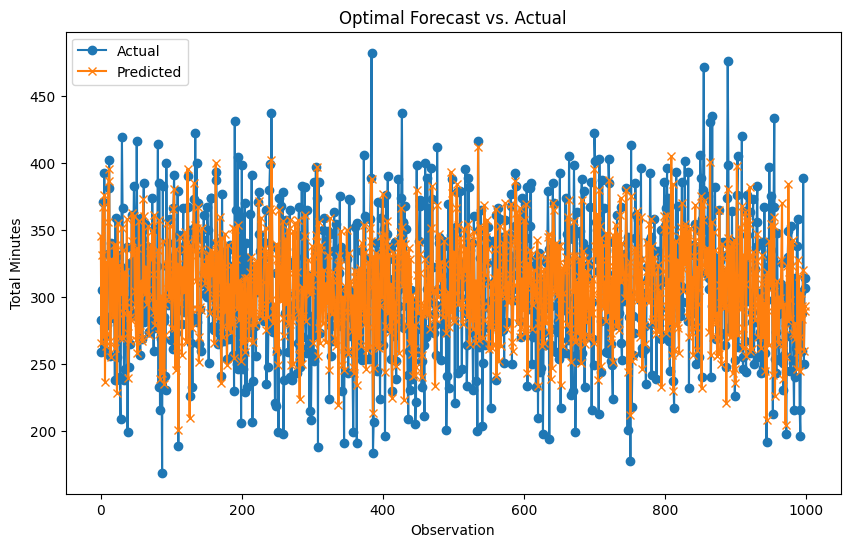

In [0]:
# Fit the best model on the entire data (train + test)
best_model.fit(X_train, y_train)

# Get the predicted values for the entire data
y_pred = best_model.predict(X_test)
y_pred_all = best_model.predict(X)
# Create a DataFrame to store the actual and predicted values
forecast_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
forecast_df.reset_index(drop=True, inplace=True)
# Visualize the forecast
plt.figure(figsize=(10, 6))
plt.plot(forecast_df['Actual'], label='Actual', marker='o')
plt.plot(forecast_df['Predicted'], label='Predicted', marker='x')
plt.xlabel('Observation')
plt.ylabel('Total Minutes')
plt.title('Optimal Forecast vs. Actual')
plt.legend()
plt.show()

In [0]:
forecast_df

,Actual,Predicted
0,283,345.351636
1,259,266.035883
2,305,331.337406
3,371,367.050727
4,261,270.987690
...,...,...
995,260,283.773595
996,389,320.353916
997,250,259.544648
998,314,289.764190
